In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os


model_path = '/content/drive/MyDrive/model.h5'



if os.path.exists(model_path):
    print("Model files found!")
else:
    print("Files not found. Please check the paths.")

Model files found!


In [7]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization


class CustomBatchNormalization(BatchNormalization):
    def get_config(self):
        config = super().get_config()
        config['axis'] = -1  # Explicitly set axis as an integer
        return config

model = load_model(model_path, custom_objects={'CustomBatchNormalization': CustomBatchNormalization})

print("Model loaded successfully!")

Model loaded successfully!


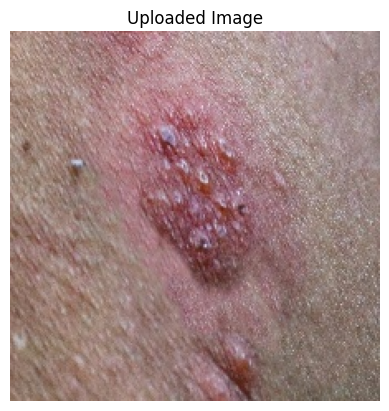

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
Predicted label: VI-shingles


In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


labels = ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus',
          'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']


le = LabelEncoder()
le.fit(labels)


image_path = '/content/138_VI-shingles (3).jpg'


img = cv2.imread(image_path)


if img is None:
    print(f"Error: Unable to load the image at {image_path}")
else:

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()


    img = cv2.resize(img, (299, 299))
    img = img.astype('float32')
    img = tf.keras.applications.resnet50.preprocess_input(img)
    img = np.expand_dims(img, axis=0)


    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_label = le.classes_[predicted_class_index]

    print(f'Predicted label: {predicted_label}')